In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Leitura dos dados
pu = pd.read_excel("C:\\Users\\eduardomoreira\\OneDrive - FUNCEF-Fundacao dos Economiarios Federais\\Investimento no Exterior\\Black Littermna\\Premissas ALM\\Carteiras Simuladas.xlsx",
                   sheet_name="Pu",
                   parse_dates=["Data"],
                   index_col="Data")


carteira = pu.iloc[:,6]
# # Plot da cotação USD
# plt.plot(carteira, color="#F29400")
# plt.title("Cotacao USD Carteira Teorica - Pesos BL")
# plt.show()

# Cálculo dos retornos
retorno = carteira.pct_change().dropna()
# print(retorno)

# VaR Paramétrico
alpha = 0.05
mu = retorno.mean()
sigma = retorno.std() *np.sqrt(252)
z = stats.norm.ppf(1 - alpha)

# var_parametrico = mu + sigma * z
# var_parametrico = var_parametrico * (-1) * 100
# print(var_parametrico)

# Simulação Monte Carlo
cota = carteira.iloc[-1]
n_ahead = 450
n_sim = 1000
variability_factor = 1


np.random.seed(208) 
simulations = []

for i in range(n_sim):
    # print(i)
    tmp = [cota] * n_ahead
    for t in range(1, n_ahead):
        tmp[t] = tmp[t - 1] * ( 1+(variability_factor * 100 * np.random.standard_t(df=len(retorno) - 1) * sigma) / n_ahead)
    simulations.append(pd.DataFrame({"Run": [i] * n_ahead, "DaysForward": np.arange(1, n_ahead + 1), "Price": tmp}))

simulations_df = pd.concat(simulations)



In [163]:

average_df = pd.DataFrame({"DaysForward": np.arange(1, n_ahead + 1), "AveragePrice": np.nan})

for t in range(1, n_ahead + 1):
    daily_prices = simulations_df[simulations_df["DaysForward"] == t]["Price"]
    avg = daily_prices.mean()
    sd = daily_prices.std()
    n = len(daily_prices)
    z = stats.norm.ppf(0.95)  # Z-score for 95% confidence interval
    
    lower_ci = avg - (z * (sd / np.sqrt(n)))
    upper_ci = avg + (z * (sd / np.sqrt(n)))
    
    average_df.loc[t - 1, "Q1"] = daily_prices.quantile(0.25)
    average_df.loc[t - 1, "Q3"] = daily_prices.quantile(0.75)
    average_df.loc[t - 1, "AveragePrice"] = avg
    average_df.loc[t - 1, "LowerCI"] = lower_ci
    average_df.loc[t - 1, "UpperCI"] = upper_ci

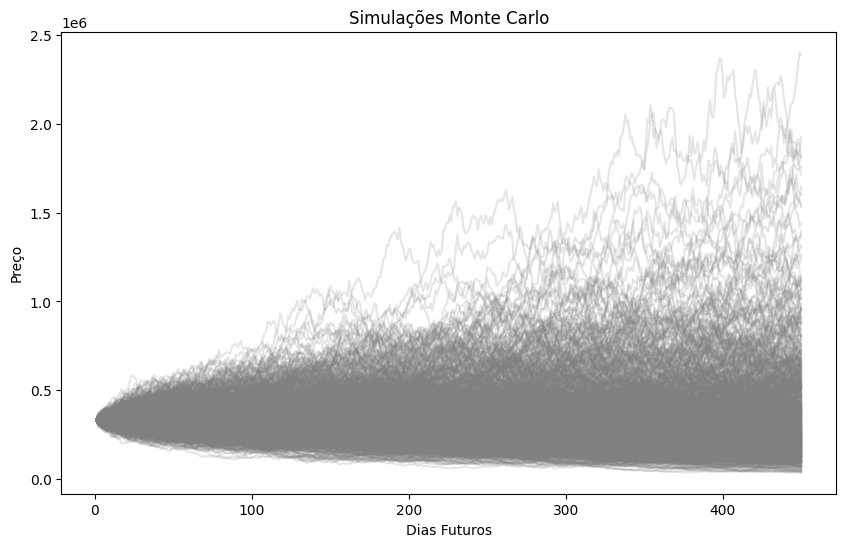

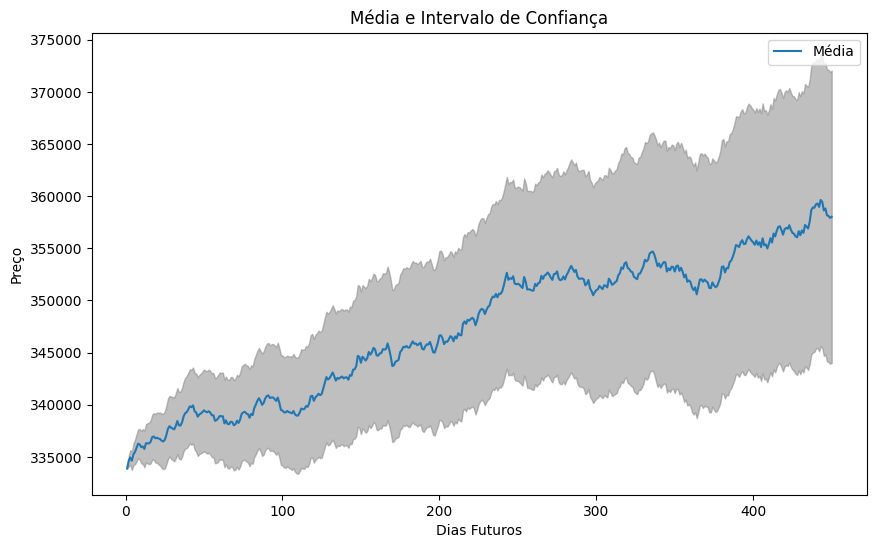

In [164]:
# Plot das simulações
plt.figure(figsize=(10, 6))
for i in range(n_sim):
    plt.plot(simulations_df[simulations_df["Run"] == i]["DaysForward"], simulations_df[simulations_df["Run"] == i]["Price"], color='gray', alpha=0.2)
plt.title("Simulações Monte Carlo")
plt.xlabel("Dias Futuros")
plt.ylabel("Preço")
plt.show()

# Plot da média
plt.figure(figsize=(10, 6))
plt.plot(average_df["DaysForward"], average_df["AveragePrice"], label="Média")
plt.fill_between(average_df["DaysForward"], average_df["LowerCI"], average_df["UpperCI"], color='gray', alpha=0.5)
plt.title("Média e Intervalo de Confiança")
plt.xlabel("Dias Futuros")
plt.ylabel("Preço")
plt.legend()
plt.show()

In [165]:


# Variação das estimativas
variacao_media = ((average_df["AveragePrice"].iloc[-1] / average_df["AveragePrice"].iloc[0]) - 1) * 100
print(variacao_media)

variacao_inferior = ((average_df["LowerCI"].iloc[-1] / average_df["LowerCI"].iloc[0]) - 1) * 100
print(variacao_inferior)

variacao_superior = ((average_df["UpperCI"].iloc[-1] / average_df["UpperCI"].iloc[0]) - 1) *100
print(variacao_superior)

# variacao_superior = ((average_df["Q3"].iloc[-1] / average_df["Q3"].iloc[0]) - 1) * 100
# print(variacao_superior)

# average_df.to_csv("C:\\Users\\eduardomoreira\\OneDrive - FUNCEF-Fundacao dos Economiarios Federais\\Investimento no Exterior\\Black Littermna\\Premissas ALM\\Resultado Monte Carlo.csv", sep=";")


7.230323067060551
3.03155256298957
11.42909357113151


In [166]:
variacao_superior

11.42909357113151